<a href="https://colab.research.google.com/github/tderr24/MAT-422/blob/main/HW_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT 422

## HW 3.2 - Continuity and Differentiation

### Thomas Derr

In [ ]:
import numpy as np
from scipy import stats
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math
import numdifftools as nd

## Limits and Continuity


If we have some function $f: D \rightarrow \mathbb{R}$ where $D\subseteq \mathbb{R}^d$

Then $f$ has limit $L \in \mathbb{R}$ as $x$ approaches $a$ if for all $\epsilon > 0$, there exists $\delta > 0$ such that

$|f(x)-L| < \epsilon$ for all $x \in D \hat B_\delta (a) \backslash \{a\}$

we can write this as

$\lim \limits _{x\rightarrow a}f(x) = L$

we call $f$ continuous at $a \in D$

$\lim \limits _{x\rightarrow a}f(x) = f(a)$


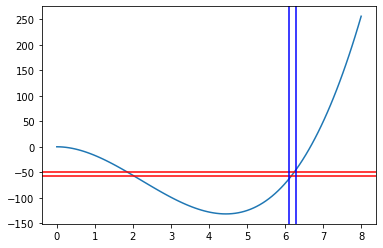

In [ ]:
x = np.linspace(0, 8, 100)
y = 3 * x ** 3 - 20 * x ** 2


def fx(x):
    return 3 * x ** 3 - 20 * x ** 2

epsilon = 4
a = 6.2
delta = 0.1

fig, ax = plt.subplots()

ax.plot(x, y)

ax.axhline(y=fx(a) - epsilon, xmin=0.0, xmax=1.0, color='r')
ax.axhline(y=fx(a) + epsilon, xmin=0.0, xmax=1.0, color='r')

ax.axvline(x=a + delta, ymin=0.0, ymax=1.0, color='b')
ax.axvline(x=a-delta, ymin=0.0, ymax=1.0, color='b')


plt.show()

## Derivatives

The derivative of a function is the rate of change of one varibable compared to another

In the simplest case, we can state that given a value $x_0 \in D$, the derivative of a function $f$ at $x_0$ is

$\frac{df(x_0)}{dx}=\lim \limits _{h \rightarrow 0} \frac{f(x_0 + h) - f(x_0)}{h}$

We call this the derivative of $f$ with respect to $x$ at $x_0$


We can generalize this by defining the partial derivative of $f$ at $x_0$ with respect to any $x_i$ as

$\frac{\partial f(x_0)}{\partial x_i} = \lim \limits _{h\rightarrow 0} \frac{f(x_0+he_i) - f(x_0)}{h}$

(where $e_i$ is the $i$th standard basis vector)

We define the gradient of $f$ at $x_0$ to be

$\nabla f(x_0) = \begin{bmatrix}(\frac{\partial f(x_0)}{\partial x_1} \\ \frac{\partial f(x_0)}{\partial x_2} \\ \vdots \\ \frac{\partial f(x_0)}{\partial x_d} )\end{bmatrix}$

IE: it is a column matrix where each index $i$ is the partial derivative of $f$ at $x_0$ with respect to $x_i$


In [ ]:
#simple derivative
def fx(x):
    return 3 * x ** 3 - 20 * x ** 2


def derivative(f, x0):
    h = 0.000001
    return (f(x0+h) - f(x0)) / h

derivative(fx, 2)

-44.000001999222604

In [ ]:
#gradient and partial derivative
point = [2,3]

f2x = lambda xy: 3 * xy ** 2 - 2 * xy ** 2

partialz = nd.Gradient(f2x)
partialx, partialy = partialz(point)

(partialx + partialy)

array([4., 6.])

## Taylor's Theorem

Taylors theorem is a generalization of the Mean Value Theorem. It gives a polynomial approximation of a function around a point.

given a function $f: D \rightarrow \mathbb{R}$ where $D \subseteq \mathbb{R}$, with an $m$ times continuous derivative on $[a,b]$, then

$f(b) = f(a) + (b-a)f'(a) + \frac{1}{2}(b-a)^2f''(a) + ... + \frac{(b-a)^{m-1}}{(m-1)!}f^{(m-1)}(a)+R_m$

Where $R_m = \frac{(b-a)^m}{(m)!}f^{(m)}(a+\theta(b-a))$ for some $0 < \theta < 1$

This is useful as it allows us to compute a polynomial function that is similar to some desired function that might be harder to compute

Text(0.5, 1.0, 'Different Order Taylor Series Compared To Original Function')

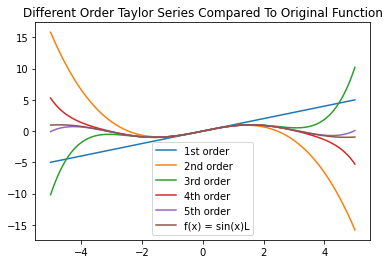

In [ ]:
x = np.linspace(-5, 5, 300)
y = np.zeros(len(x))


lines = ['1st order', '2nd order', '3rd order', '4th order', '5th order']
plt.figure()

for n, line in zip(range(5), lines):
    y0 = y + ((-1)**n * (x)**(2*n+1)) / np.math.factorial(2*n+1)
    y = y0
    plt.plot(x,y,label = line)

plt.plot(x, np.sin(x), label='f(x) = sin(x)L')
plt.legend()
plt.title("Different Order Taylor Series Compared To Original Function")
